# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [50]:
temp = pd.read_csv('Temp_States.csv', encoding = 'latin1')

#### Print `temp`

In [12]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [13]:
temp.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 1.1 KB


#### Select the rows where state is New York

In [18]:
temp.loc[temp['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [21]:
temp.loc[temp['State'] == 'New York'].mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [23]:
temp.loc[temp['Temperature'] > 15, ('City','State')]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [38]:
temp.loc[temp['Temperature']>15, ['City']]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [36]:
temp.loc[(temp['Temperature']>15) & (temp['Temperature']<20), ['City']]

,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [40]:
temp.groupby('State').mean().Temperature

State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64

In [44]:
temp.groupby('State').std().Temperature

State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [52]:
employee = pd.read_csv('employee.csv', encoding = 'latin1')

#### Explore the data types of the Temp dataframe. Comment your results

In [53]:
employee.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 3.0 KB


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

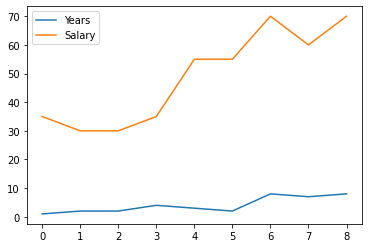

In [56]:
employee.plot();

#### What's the average salary in this company?

In [62]:
employee.mean().Salary

48.888888888888886

#### What's the highest salary?

In [63]:
employee.max().Salary

70

#### What's the lowest salary?

In [64]:
employee.min().Salary


30

#### Who are the employees with the lowest salary?

In [75]:
employee.loc[employee['Salary'] == employee.min().Salary, ['Name','Salary']]


,Name,Salary
1,Maria,30
2,David,30


#### Could you give all the information about an employee called David?

In [76]:
employee.loc[employee['Name']=='David']


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [82]:
employee.loc[employee['Name']=='David','Salary']


2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [84]:
employee.loc[employee['Title']=='associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [85]:
employee.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [87]:
employee.iloc[:3]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [89]:
employee.loc[(employee['Title']=='associate') & (employee['Salary']>55)]


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [93]:
employee.groupby('Years').mean().Salary

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [101]:
employee.groupby('Title').mean().Salary

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

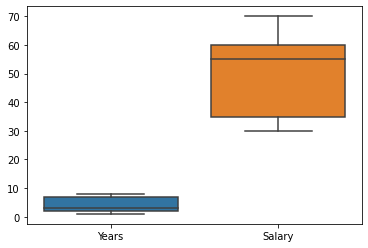

In [135]:
#sns.boxplot( x=employee['Title'], y=employee['Salary']);
sns.boxplot(data=employee);

In [131]:
# print first quartile here
print(np.quantile(employee.Salary,0.25))

35.0


In [133]:
# print third quartile here
print(np.quantile(employee.Salary,0.75))

60.0


#### Is the mean salary per gender different?

In [136]:
employee.groupby('Gender').mean().Salary

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [140]:
employee.groupby('Department').agg({'Years': ['mean', 'min', 'max'], 'Salary': ['mean', 'min', 'max']})

Years         Salary        
                mean min max   mean min max
Department                                 
HR          4.666667   2   8  45.00  30  70
IT          4.500000   1   8  48.75  30  70
Sales       2.500000   2   3  55.00  55  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [2]:
orders = pd.read_csv('orders.csv', encoding = 'latin1')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [3]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 141.2 MB


In [4]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [ ]:
orders.mean().amount_spent

#### What were the highest and lowest purchase prices? 

In [5]:
orders.min().amount_spent

0.0

In [6]:
orders.max().amount_spent

168469.6

#### Select all the customers we have in Spain

In [9]:
orders.loc[orders['Country']=='Spain', ['CustomerID']]

,CustomerID
4250,12557
4251,12557
4252,12557
4253,12557
4254,12557
...,...
394733,17097
394734,17097
394735,17097
394736,17097


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [20]:
orders.CustomerID[orders.Country == 'Spain'].count()

2485

#### Select all the customers who have bought more than 50 items ?

In [47]:
orders.loc[orders['Quantity']>50, ['CustomerID']]

#### Select orders from Spain that are above 50 items

In [31]:
orders.loc[(orders['Quantity']>50) & (orders['Country']=='Spain') , ['CustomerID']]

#### Select all free orders

In [9]:
orders.loc[orders['UnitPrice']==0]

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [13]:
orders.loc[orders['Description'].str.contains('lunch bag')]

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [20]:
orders.loc[(orders['year']==2010) & (orders['Description'].str.contains('lunch bag'))]

#### Show the frequency distribution of the amount spent in Spain.

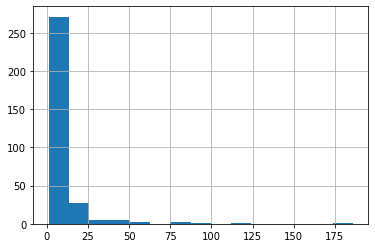

In [54]:
orders_spain=orders[orders['Country'] == 'Spain']

orders_freq=orders_spain['amount_spent'].value_counts()

histo=orders_freq.hist(bins=15)
histo;

#### Select all orders made in the month of August

In [23]:
orders.loc[orders['month']==8]

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [30]:
orders.InvoiceNo[(orders.Country == 'Spain') & (orders.month == 8)].count()

252

#### What's the  average amount of money spent by country

In [46]:
orders.groupby('Country').mean().amount_spent

#### What's the most expensive item?

In [39]:
orders.max().UnitPrice

8142.75

#### What was the average amount spent per year ?

In [44]:
orders.groupby('year').mean().amount_spent

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64